In [1]:
# Importing The Necessary Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
df = pd.read_excel('Online_Retail.xlsx')

Top 10 Products by Quantity Sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


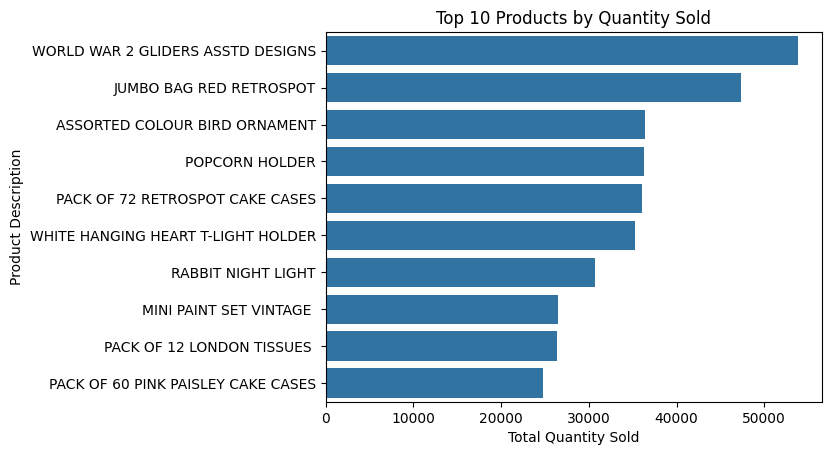

In [3]:
# Bar Chart

# Group by 'Description', sum the 'Quantity', and get the top 10 products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print the top products and their quantities
print("Top 10 Products by Quantity Sold:")
print(top_products)

# Plot the bar chart
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# Analysis Of Bar Chart
The bar chart displays the top 10 products by quantity sold. "WORLD WAR 2 GLIDERS ASSTD DESIGNS" leads with the highest quantity sold, followed by "JUMBO BAG RED RETROSPOT" and "ASSORTED COLOUR BIRD ORNAMENT." These products significantly outperform others, highlighting their strong popularity and sales performance in the dataset.

Sales Distribution by Country:
Country
EIRE               142637
France             110480
Germany            117448
Netherlands        200128
United Kingdom    4263829
Others             341928
Name: Quantity, dtype: int64


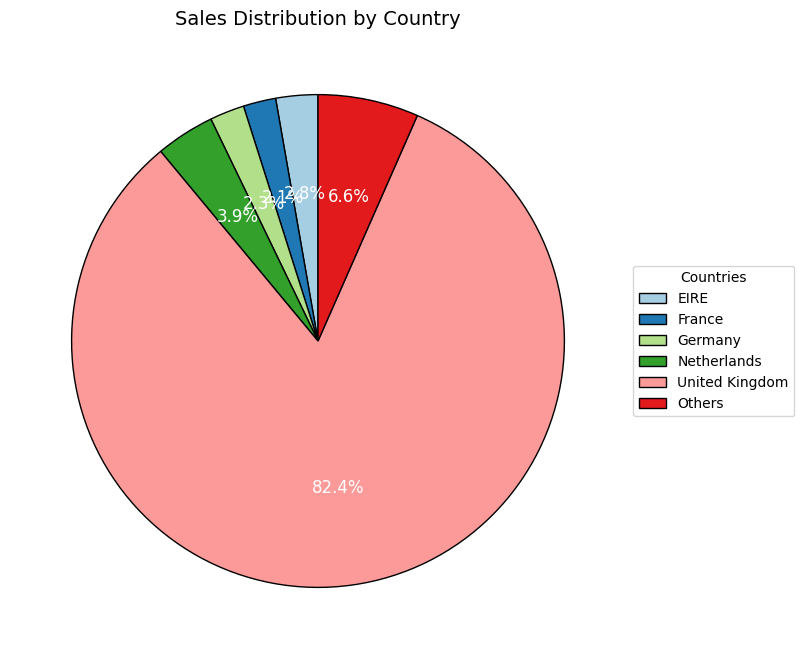

In [7]:
# Pie Chart

region_sales = df.groupby('Country')['Quantity'].sum()

# Set a threshold for small segments
threshold = region_sales.sum() * 0.02

# Combine small segments into 'Others'
sales_summary = region_sales[region_sales > threshold]
sales_summary['Others'] = region_sales[region_sales <= threshold].sum()

# Print the sales summary data
print("Sales Distribution by Country:")
print(sales_summary)

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Paired(range(len(sales_summary)))

wedges, texts, autotexts = ax.pie(
    sales_summary,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

# Adding title
ax.set_title('Sales Distribution by Country', fontsize=14)

# Adding legend
ax.legend(wedges, sales_summary.index, title='Countries', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Formatting percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# Show the plot
plt.show()

# Analysis Of Pie Chart
The pie chart reveals that the United Kingdom is the dominant market, contributing 82.4% of total sales. Netherlands, Germany, France, and EIRE each have smaller shares, while the "Others" category represents a combined 4.3% from various smaller markets. This indicates a strong market presence in the UK with smaller but notable contributions from other regions.

c:\Users\shaan\Desktop\Advanced Data Visualization\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Normalized Unit Prices:
count    541907.000000
mean          1.239656
std           0.658708
min           0.000000
25%           0.810930
50%           1.124930
75%           1.635106
max          10.570573
Name: UnitPrice, dtype: float64


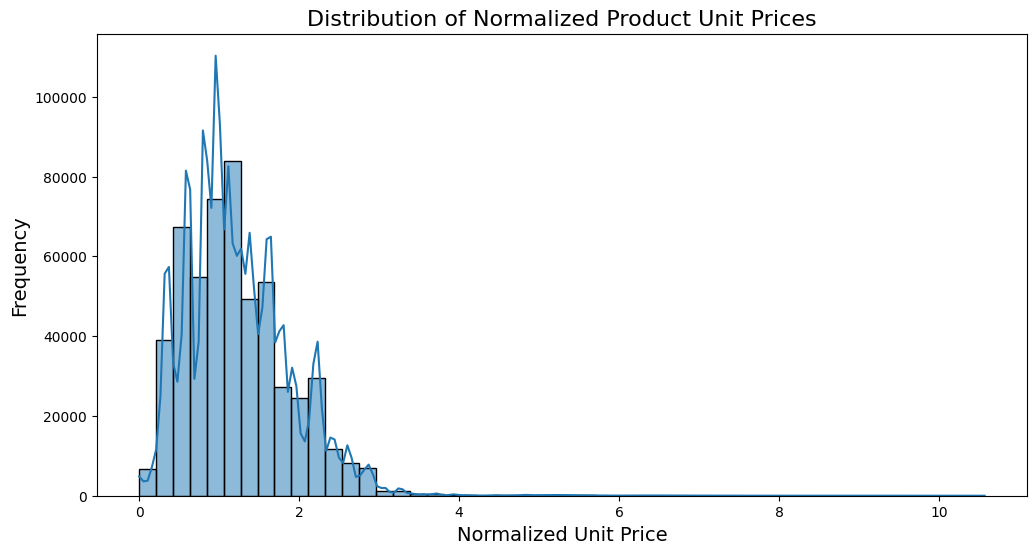

In [8]:
# Histogram

# Normalize the data
normalized_prices = np.log1p(df['UnitPrice'])

# Print the normalized prices data
print("Normalized Unit Prices:")
print(normalized_prices.describe())

plt.figure(figsize=(12, 6))

# Plot histogram with KDE on normalized data
sns.histplot(normalized_prices, bins=50, kde=True)

# Adding title and labels
plt.title('Distribution of Normalized Product Unit Prices', fontsize=16)
plt.xlabel('Normalized Unit Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

# Analysis Of Histogram
The histogram of normalized product unit prices shows a concentration of prices around lower normalized values, with the majority of prices falling between 0.81 and 1.63. The distribution is right-skewed, indicating fewer products with higher normalized prices.

Sales Over Time:
InvoiceDate
2010-12    342228
2011-01    308966
2011-02    277989
2011-03    351872
2011-04    289098
2011-05    380391
2011-06    341623
2011-07    391116
2011-08    406199
2011-09    549817
2011-10    570532
2011-11    740286
2011-12    226333
Freq: M, Name: Quantity, dtype: int64


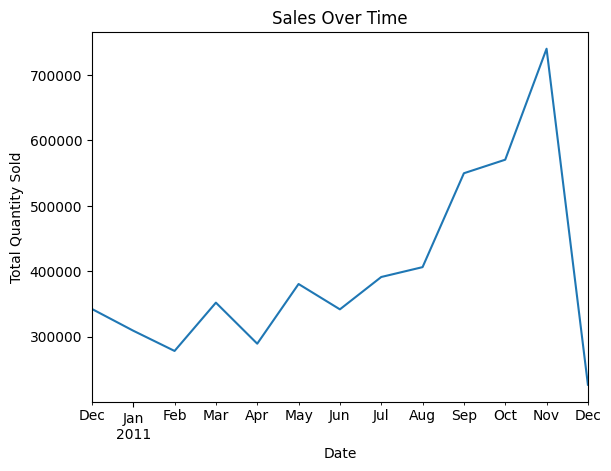

In [9]:
# Timeline Chart

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate sales data over time
sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Print the sales over time data
print("Sales Over Time:")
print(sales_over_time)

# Plot the sales data
sales_over_time.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

# Analysis Of Timeline Chart
The line chart reveals a notable increase in total quantity sold from December 2010 through November 2011, peaking in November with 740,286 units. The trend shows significant growth in sales during the mid-year months, followed by a sharp decline in December. This indicates a strong seasonal peak in sales around November, with a considerable drop-off towards the end of the year.

Regression Line Parameters:
Slope: -0.0028
Intercept: 9.5651
R-squared: 0.0000
P-value: 0.3633
Standard Error: 0.0031


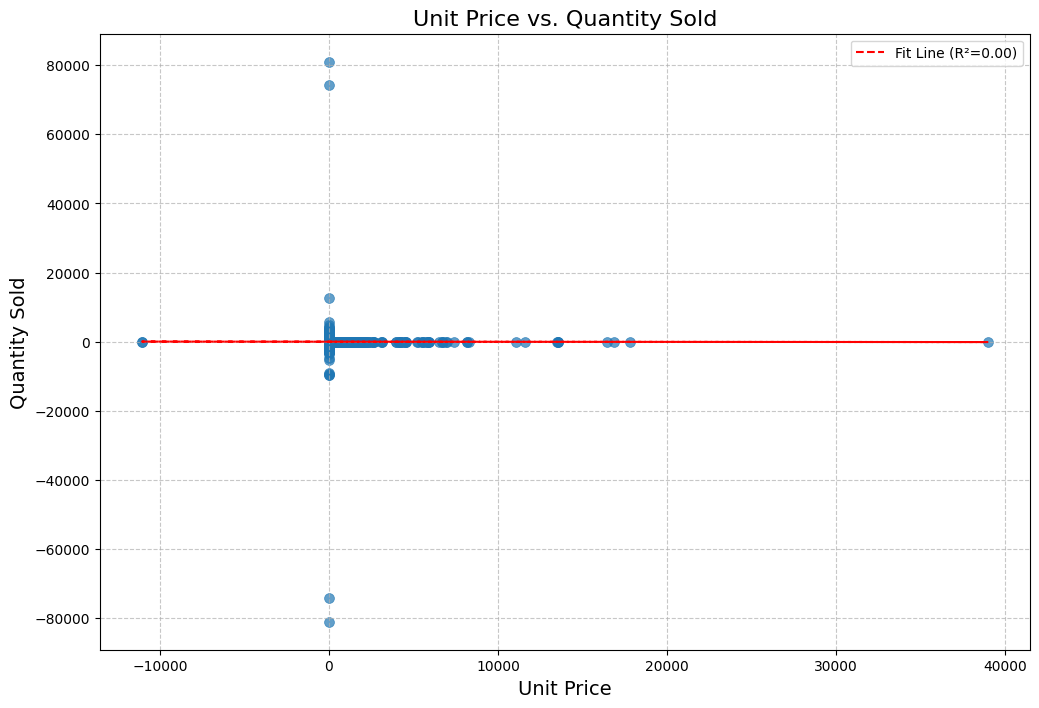

In [10]:
# Scatter Plot

from scipy.stats import linregress

# Scatter plot with regression line
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, alpha=0.7, s=50, edgecolor=None)

# Fit and plot a regression line
unit_price_clean = df['UnitPrice'].dropna()
quantity_clean = df['Quantity'].dropna()
slope, intercept, r_value, p_value, std_err = linregress(unit_price_clean, quantity_clean)

# Print regression statistics
print("Regression Line Parameters:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

# Plot regression line
plt.plot(unit_price_clean, slope * unit_price_clean + intercept, color='red', linestyle='--', label=f'Fit Line (R²={r_value**2:.2f})')

# Adding title and labels
plt.title('Unit Price vs. Quantity Sold', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Analysis Of Scatter Plot
The regression analysis reveals a slope of -0.0028 and an intercept of 9.5651, indicating a slight negative relationship between unit price and quantity sold. However, the R-squared value is 0.0000, suggesting that the unit price explains virtually none of the variation in quantity sold. The p-value of 0.3633 indicates that the relationship is not statistically significant. The standard error of 0.0031 reflects the variability in the regression line's slope estimate.

Top 10 Countries by Quantity Sold:
           Country  Quantity  UnitPrice
36  United Kingdom   4263829   4.532422
24     Netherlands    200128   2.738317
10            EIRE    142637   5.911077
14         Germany    117448   3.966930
13          France    110480   5.028864
0        Australia     83653   3.220612
32          Sweden     35637   3.910887
33     Switzerland     30325   3.403442
31           Spain     26824   4.987544
20           Japan     25218   2.276145


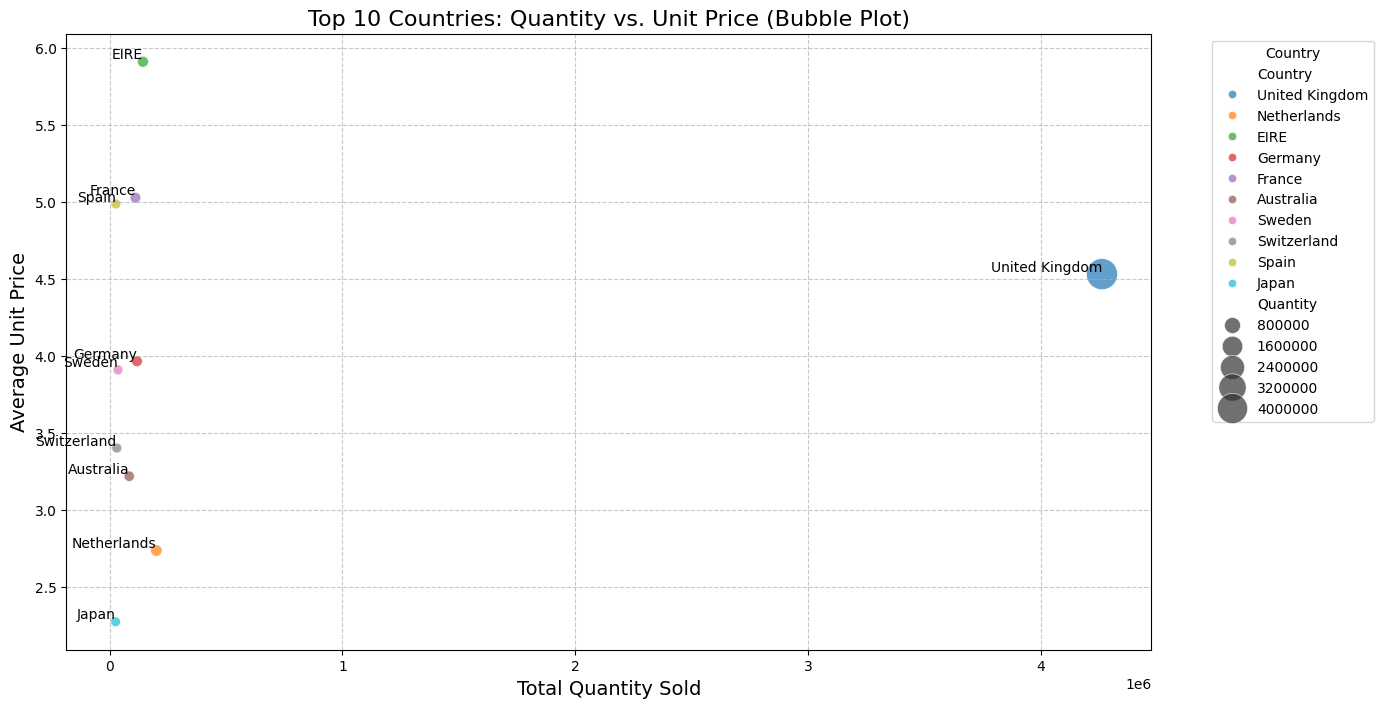

In [11]:
# Bubble Plot

# Group and aggregate data
country_data = df.groupby('Country').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()

# Filter to top 10 countries by quantity
top_countries = country_data.nlargest(10, 'Quantity')

# Print the top countries data
print("Top 10 Countries by Quantity Sold:")
print(top_countries)

# Create the bubble plot
plt.figure(figsize=(14, 8))

# Bubble plot with size and hue
bubble_plot = sns.scatterplot(
    x='Quantity', 
    y='UnitPrice', 
    size='Quantity', 
    hue='Country', 
    data=top_countries, 
    sizes=(50, 500),
    palette='tab10', 
    alpha=0.7,
    edgecolor='w'
)

# Add annotations
for i, row in top_countries.iterrows():
    bubble_plot.text(
        row['Quantity'], row['UnitPrice'], 
        row['Country'], 
        size=10, 
        ha='right', 
        va='bottom'
    )

# Adding title and labels
plt.title('Top 10 Countries: Quantity vs. Unit Price (Bubble Plot)', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Average Unit Price', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customizing legend
handles, labels = bubble_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Analysis Of Bubble Plot
The United Kingdom leads significantly in total quantity sold, far surpassing other countries, indicating its dominance in the market. The average unit price varies widely, with Ireland having the highest and Japan the lowest, suggesting differing pricing strategies and market conditions across regions.

In [15]:
# Product Wise Sales

# Calculate total sales per row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by product and calculate total sales
product_sales = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()

# Rename columns for clarity
product_sales.rename(columns={'Quantity': 'TotalQuantitySold'}, inplace=True)

In [16]:
# Print the complete product-wise sales data
print("Product-Wise Sales:")
product_sales

Product-Wise Sales:


,Description,TotalQuantitySold,TotalSales
0,20713,-400,0.00
1,4 PURPLE FLOCK DINNER CANDLES,144,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,1913,2341.13
3,DOLLY GIRL BEAKER,2448,2882.50
4,I LOVE LONDON MINI BACKPACK,389,1628.17
...,...,...,...
4218,wrongly marked carton 22804,-256,0.00
4219,wrongly marked. 23343 in box,-3100,0.00
4220,wrongly sold (22719) barcode,170,0.00
4221,wrongly sold as sets,-600,0.00


In [17]:
# Print top 5 products by total sales
print("\nTop 5 Products by Total Sales:")
top_sales_products = product_sales.sort_values(by='TotalSales', ascending=False).head(5)
top_sales_products


Top 5 Products by Total Sales:


,Description,TotalQuantitySold,TotalSales
1098,DOTCOM POSTAGE,707,206245.48
2915,REGENCY CAKESTAND 3 TIER,13033,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2471,PARTY BUNTING,18022,98302.98
1866,JUMBO BAG RED RETROSPOT,47363,92356.03


In [18]:
# Print top 5 products by quantity sold
print("\nTop 5 Products by Quantity Sold:")
top_quantity_products = product_sales.sort_values(by='TotalQuantitySold', ascending=False).head(5)
top_quantity_products


Top 5 Products by Quantity Sold:


,Description,TotalQuantitySold,TotalSales
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
2740,POPCORN HOLDER,36334,33969.46
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72


# Analysis Of Product Wise Sales
Top Products by Total Sales: The DOTCOM POSTAGE leads in total sales, indicating high revenue per unit, while the JUMBO BAG RED RETROSPOT performs strongly in both sales and quantity, showing its broad appeal.

Top Products by Quantity Sold: The JUMBO BAG RED RETROSPOT is the top seller by quantity, reflecting high demand, whereas ASSORTED COLOUR BIRD ORNAMENT and POPCORN HOLDER also contribute significantly to volume sales.

In [19]:
# Region Wise Sales

# Calculate total sales per row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by region (country) and calculate total sales
region_sales = df.groupby('Country').agg({
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()

# Rename columns for clarity
region_sales.rename(columns={'Quantity': 'TotalQuantitySold'}, inplace=True)

In [20]:
# Print the result
print("Region-Wise Sales:")
region_sales

Region-Wise Sales:


,Country,TotalQuantitySold,TotalSales
0,Australia,83653,137077.270
1,Austria,4827,10154.320
2,Bahrain,260,548.400
3,Belgium,23152,40910.960
4,Brazil,356,1143.600
5,Canada,2763,3666.380
6,Channel Islands,9479,20086.290
7,Cyprus,6317,12946.290
8,Czech Republic,592,707.720
9,Denmark,8188,18768.140


In [21]:
# Print top 5 regions by total sales
top_sales_regions = region_sales.nlargest(5, 'TotalSales')
print("\nTop 5 Regions by Total Sales:")
top_sales_regions


Top 5 Regions by Total Sales:


,Country,TotalQuantitySold,TotalSales
36,United Kingdom,4263829,8187806.364
24,Netherlands,200128,284661.540
10,EIRE,142637,263276.820
14,Germany,117448,221698.210
13,France,110480,197403.900


In [22]:
# Print top 5 regions by quantity sold
top_quantity_regions = region_sales.nlargest(5, 'TotalQuantitySold')
print("\nTop 5 Regions by Quantity Sold:")
top_quantity_regions


Top 5 Regions by Quantity Sold:


,Country,TotalQuantitySold,TotalSales
36,United Kingdom,4263829,8187806.364
24,Netherlands,200128,284661.540
10,EIRE,142637,263276.820
14,Germany,117448,221698.210
13,France,110480,197403.900


# Analysis Of Region Wise Sales
The United Kingdom significantly outperforms other regions with the highest total sales and quantity sold, reflecting its major market share. Netherlands and EIRE follow with substantial sales figures, while Germany and France show strong performance, though at lower levels compared to the UK. This suggests a concentrated sales presence in the UK, with other regions contributing notably but to a lesser extent.